In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import umap

In [2]:
# Load embeddings
# embeddings are saved as an array of json objects
# each json object has a key 'embedding' which is a list of floats
# the list of floats is the embedding for the post
# read json file
embeddingsjson = pd.read_json("./data/survey_embeddings.json")

In [3]:
# postsjson = pd.read_json("./posts/posts.json")

In [4]:
embeddingsjson.head()

,0,id
0,"{'object': 'embedding', 'index': 0, 'embedding...",0
1,"{'object': 'embedding', 'index': 0, 'embedding...",1
2,"{'object': 'embedding', 'index': 0, 'embedding...",2
3,"{'object': 'embedding', 'index': 0, 'embedding...",3
4,"{'object': 'embedding', 'index': 0, 'embedding...",4


In [6]:
embeddingsjson.values[0][0]['embedding']

[-0.014735327000000001,
 0.012439805,
 0.00857728,
 -0.021993026000000002,
 -0.046212845,
 0.0050858874,
 -0.0051202513,
 -0.008405459,
 -0.019477574,
 -0.042583995,
 0.006240521000000001,
 0.013312654,
 -0.0002839334,
 -0.0017345281,
 -0.012474169,
 0.009752532500000001,
 0.028618425000000003,
 -0.023106422,
 0.01076971,
 -0.043023854,
 -0.031340063,
 0.018707817,
 -0.014006808,
 -0.0012620217000000001,
 -0.004298949000000001,
 0.023120169000000003,
 0.019711249,
 -0.019051459,
 -0.0066906908,
 -0.0036529042000000003,
 0.0058831344,
 -0.0027731832000000003,
 -0.009305799,
 -0.015944943,
 -0.028590932000000003,
 0.005553239000000001,
 -0.019230152,
 -0.005388291,
 0.035738666,
 -0.008199275,
 0.024426004,
 0.018597852,
 -0.018845273000000003,
 -0.012254239,
 -0.020123618000000003,
 0.022529105,
 -0.011608194,
 -0.02125076,
 0.030487832000000003,
 0.022281684000000003,
 0.008336731,
 0.056412112,
 -0.023876179,
 0.016068654,
 0.0024312602000000003,
 -0.0060102814,
 0.009374527,
 0.03136

In [7]:
# convert json to a numpy array that can be fed to umap
embeddings = np.array([np.array(x[0]['embedding']) for x in embeddingsjson.values])

In [8]:
embeddings.shape

(1568, 1536)

In [13]:
# reduce dimensionality with umap
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.05,
    metric='cosine',
    random_state=42,
    n_components=2,
    verbose=True
)

In [14]:
embedding = reducer.fit_transform(embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.05, random_state=42, verbose=True)
Sat Apr 15 18:41:10 2023 Construct fuzzy simplicial set
Sat Apr 15 18:41:12 2023 Finding Nearest Neighbors
Sat Apr 15 18:41:12 2023 Finished Nearest Neighbor Search
Sat Apr 15 18:41:12 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Apr 15 18:41:14 2023 Finished embedding


In [11]:
embedding.shape

(1568, 2)

/var/folders/sx/rrvr6l_d5x1_g46jxlx5ypfc0000gn/T/ipykernel_2034/2305409010.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')


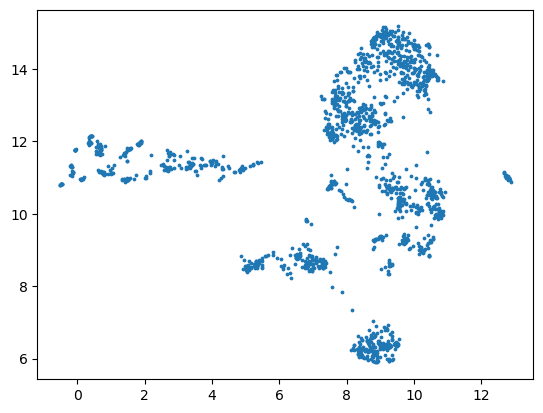

In [12]:
# plot embedding
plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')
plt.show()

/var/folders/sx/rrvr6l_d5x1_g46jxlx5ypfc0000gn/T/ipykernel_2034/2305409010.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')


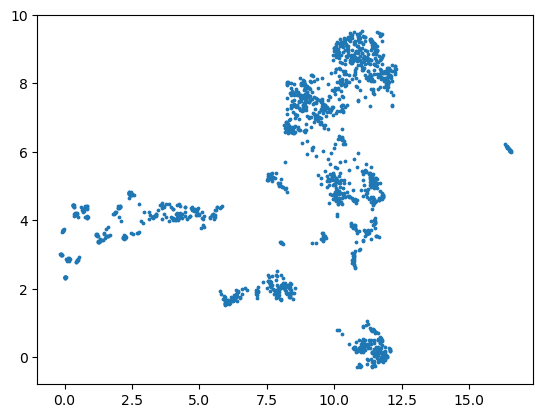

In [15]:
# plot embedding
plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')
plt.show()

In [16]:
#write embedding to csv file with header x,y
np.savetxt("./data/dvs-umap.csv", embedding, delimiter=",", header="x,y", comments='')

In [17]:
# Create an HDBSCAN instance with custom parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)



In [18]:
# Fit the model to your dataset
clusterer.fit(embedding)

HDBSCAN(min_samples=5)

In [19]:
clusterer.labels_

array([-1, 33, 33, ...,  3,  3,  3])

In [20]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

In [21]:
# write clusterer.labels_ to a csv file
np.savetxt("./data/dvs-labels.csv", clusterer.labels_, delimiter=",", header="cluster", comments="")